In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Preview the data
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [13]:
# For concise summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 71.5+ KB
None


In [21]:
# For descriptive statistics of the dataset
print(df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000

In [17]:
# Check missing values
print(df.isnull().sum())

# Filling missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)


# Filling missing Embarked with most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)


# Convert 'Sex' to numbers (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-2000090107.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2000090107.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

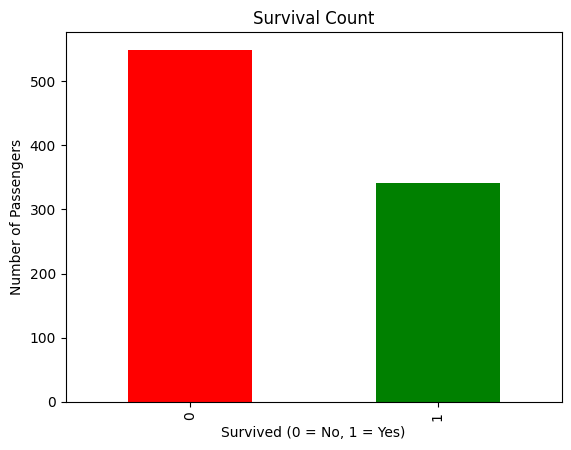

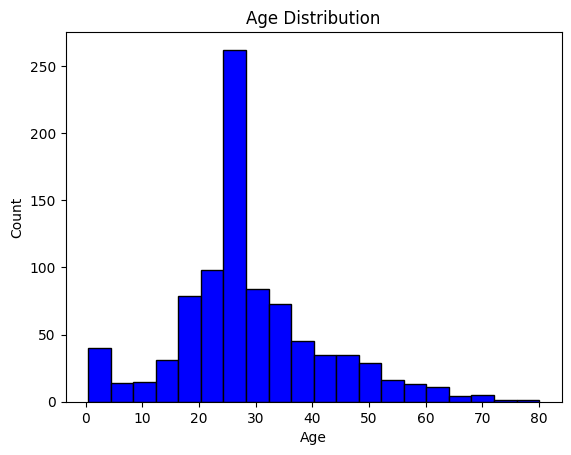

In [8]:
# Count of survivors and non-survivors
df['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()

# Age distribution
plt.hist(df['Age'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

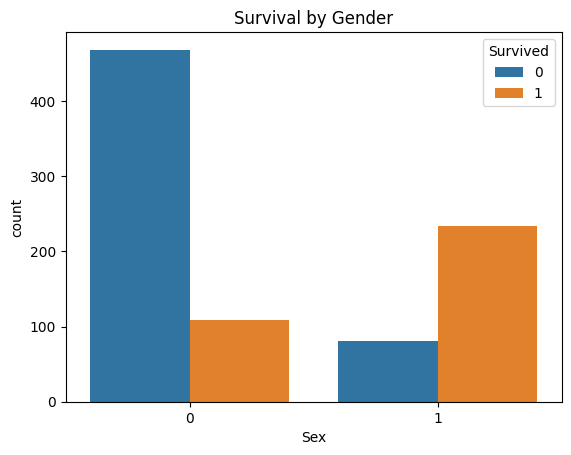

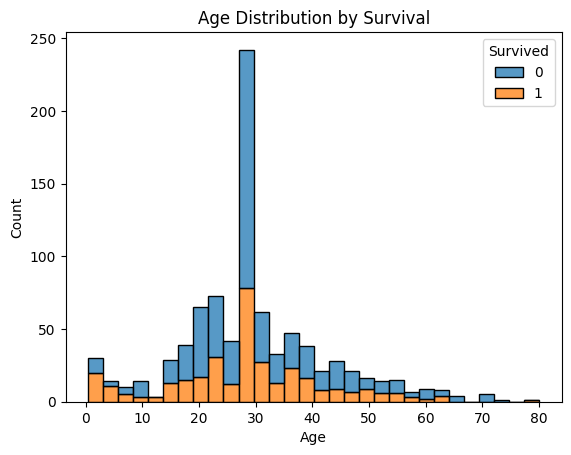

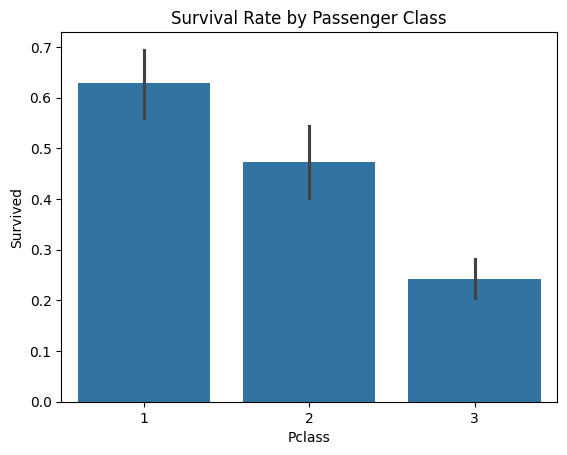

In [11]:
# Survival rate by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=False)
plt.title('Age Distribution by Survival')
plt.show()

# Class vs survival rate
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()


In [22]:
# Select the Features (X) & Target (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

